In [1]:
import pandas as pd
dataset = pd.read_csv('car.csv')

In [2]:
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1695,low,low,4,more,med,low,unacc
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset = dataset.apply(le.fit_transform)

In [4]:
x = dataset.iloc[:, 0:6]
y = dataset.iloc[:, -1]

In [5]:
x

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1695,1,1,2,2,1,1
1696,1,1,2,2,1,2
1697,1,1,2,2,1,0
1698,1,1,2,2,0,1


In [6]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1695    2
1696    1
1697    3
1698    2
1699    1
Name: class, Length: 1700, dtype: int32

In [7]:
X = x.values
Y = y.values

In [8]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 2, 2, 1, 0],
       [1, 1, 2, 2, 0, 1],
       [1, 1, 2, 2, 0, 2]])

In [9]:
Y

array([2, 2, 2, ..., 3, 2, 1])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [11]:
X

array([[1.        , 1.        , 0.        , 0.        , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.5       ,
        0.        ],
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.        ,
        1.        ]])

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(Y)

In [13]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [14]:
Y.shape

(1700, 4)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
X_train.shape

(1360, 6)

In [17]:
X_test.shape

(340, 6)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# define the keras model
model = Sequential(name='sequential_1')
model.add(Dense(12, input_dim=6, activation='relu', name='dense_1'))
model.add(Dense(8, activation='relu', name='dense_2'))
model.add(Dense(4, activation='softmax', name='dense_3'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [20]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=17)

Epoch 1/100
80/80 [==============================] - 2s 2ms/step - loss: 0.8881 - accuracy: 0.6309
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.7015
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7213
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7824
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8022
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8213
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8382
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8360
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8441
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8537
Epoch 11/

In [23]:
hist.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [24]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [25]:
acc = hist.history['accuracy']
loss = hist.history['loss']

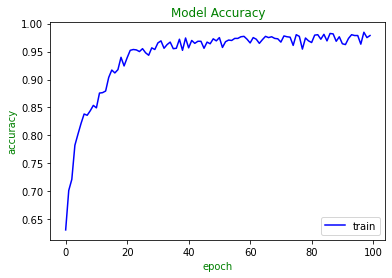

<Figure size 432x288 with 0 Axes>

In [26]:
from matplotlib import pyplot as plt
# plot training accuracy
plt.plot(acc, color='blue')
plt.title('Model Accuracy', color='green')
plt.ylabel('accuracy', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='lower right')
plt.show()
plt.savefig('accuracy_curve.png')

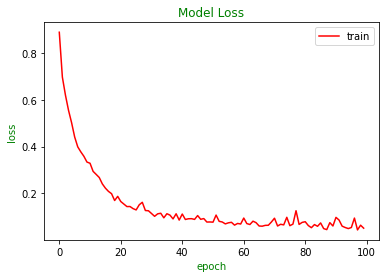

<Figure size 432x288 with 0 Axes>

In [27]:
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [28]:
history_test = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9735


In [29]:
history_train = model.evaluate(X_train, Y_train)

43/43 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9838


In [30]:
history_test

[0.07309771329164505, 0.9735293984413147]